In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib

import self_defined_functions as ft

In [16]:
ANOVA_df = ft.get_ANOVA_df()

# 2Way ANOVA of different holiday

In [44]:
ANOVA_df_before2020 = ANOVA_df[ANOVA_df['year'] < 2020 ]
ANOVA_df_before2020_noTy = ANOVA_df_before2020[ANOVA_df_before2020['is_typhoon'] == False]
ANOVA_df_before2020_noTy_noCNYE = ANOVA_df_before2020_noTy[ANOVA_df_before2020_noTy['is_CNYE'] == False]

In [45]:
ANOVA_df_before2020_noTy

,date,year,month,day,trans_cnt,is_typhoon,day_type,holi_type,holi_len,is_CNYE,is_NYE
0,2005-01-01,2005,1,1,382902,False,National,元旦,2,False,False
1,2005-01-02,2005,1,2,412908,False,National,元旦,2,False,False
2,2005-01-03,2005,1,3,298141,False,weekday,weekday,0,False,False
3,2005-01-04,2005,1,4,252051,False,weekday,weekday,0,False,False
4,2005-01-05,2005,1,5,263399,False,weekday,weekday,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5473,2019-12-27,2019,12,27,778221,False,weekday,weekday,0,False,False
5474,2019-12-28,2019,12,28,718527,False,weekend,weekend,2,False,False
5475,2019-12-29,2019,12,29,632035,False,weekend,weekend,2,False,False
5476,2019-12-30,2019,12,30,625193,False,weekday,weekday,0,False,False


In [46]:
results1 = smf.ols('trans_cnt~ C(day_type)', data=ANOVA_df_before2020_noTy_noCNYE).fit()
results2 = smf.ols('trans_cnt~ C(holi_type)', data=ANOVA_df_before2020_noTy_noCNYE).fit()
# aov_table = sms.anova_lm( results, typ=2)
# aov_table

In [47]:
stat1, p1 = stats.shapiro( results1.resid )
stat2, p2 = stats.shapiro( results2.resid )
print( f'p = {p1:.4f}' )
print( f'p = {p2:.4f}' )

p = 0.0000
p = 0.0000


c:\Users\PuSung\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
len( results1.resid )

5214

In [49]:
resid_dict1 = ft.build_dict( ANOVA_df_before2020_noTy_noCNYE['date'], results1.resid )
resid_dict2 = ft.build_dict( ANOVA_df_before2020_noTy_noCNYE['date'], results2.resid )

In [69]:
importlib.reload( ft )

<module 'self_defined_functions' from 'c:\\PuSung\\University\\Sophomore\\110-2 Academic\\Satistics\\Statistics_FinalProject\\project_TRA\\self_defined_functions.py'>

In [72]:
ft.Chi_Square_for_Normality( results1.resid, 5, 0.05 )

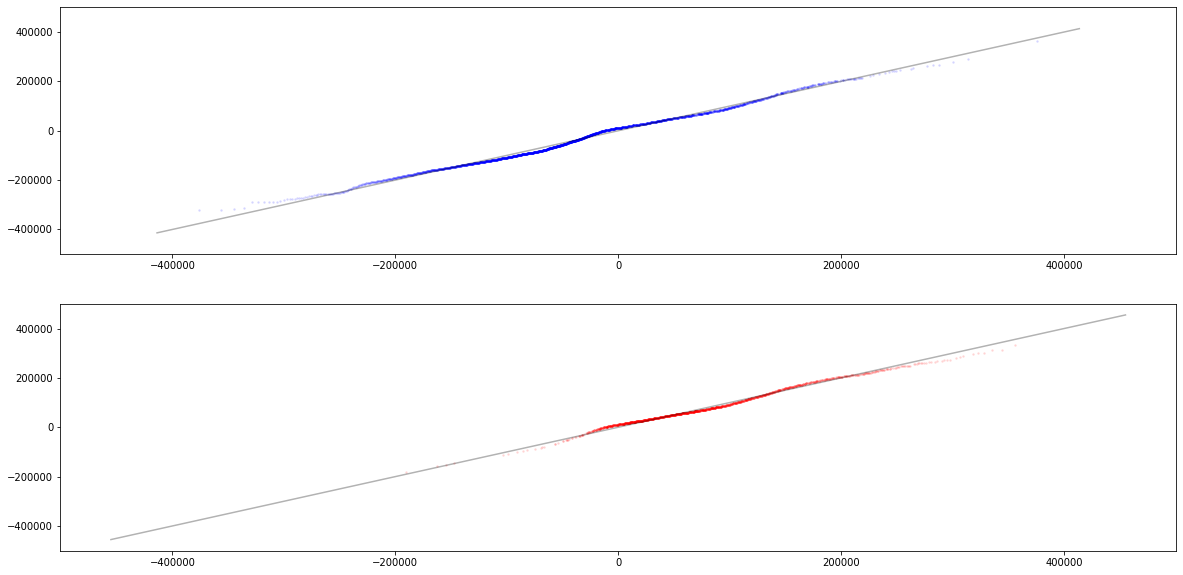

In [65]:
dates = ft.self_qqplot( resid_dict1 )

In [68]:
dates[:10]

array([Timestamp('2009-01-25 00:00:00'), Timestamp('2005-01-11 00:00:00'),
       Timestamp('2005-12-14 00:00:00'), Timestamp('2005-01-13 00:00:00'),
       Timestamp('2005-12-13 00:00:00'), Timestamp('2015-09-25 00:00:00'),
       Timestamp('2005-12-15 00:00:00'), Timestamp('2005-01-15 00:00:00'),
       Timestamp('2019-10-09 00:00:00'), Timestamp('2005-01-16 00:00:00')],
      dtype=object)

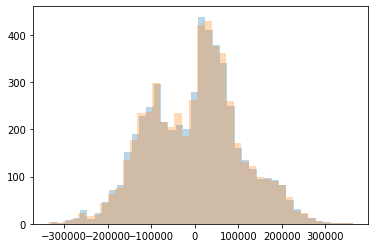

In [52]:
_ = plt.hist( results1.resid, bins='auto', alpha = 0.3 )
_ = plt.hist( results2.resid, bins='auto', alpha = 0.3 )

In [ ]:
import seaborn as sns

In [ ]:
AFTER_2020 = np.array( YEAR ) > 2020

In [ ]:
sns_df = pd.DataFrame( {'After_2020' : AFTER_2020, 'cnt' : CNT, 'resid':results.resid } )

Text(0, 0.5, 'Value')

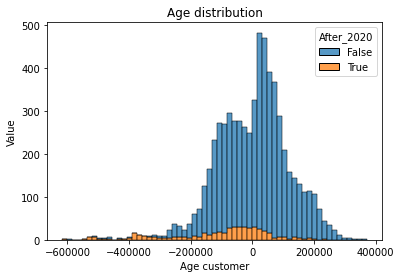

In [ ]:
sns.histplot(data=sns_df, x="resid", hue="After_2020", multiple="stack")
plt.title("Age distribution")
plt.xlabel("Age customer")
plt.ylabel("Value")

# 2 way ANOVA of different length of weekends